# Explore here

In [32]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

import warnings

In [33]:
# Get data
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [34]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [35]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [36]:
df.shape

(20640, 9)

In [37]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [38]:
df.duplicated().sum()

np.int64(0)

## Análisis de variables númericas


In [39]:
variables = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude', 'MedHouseVal']

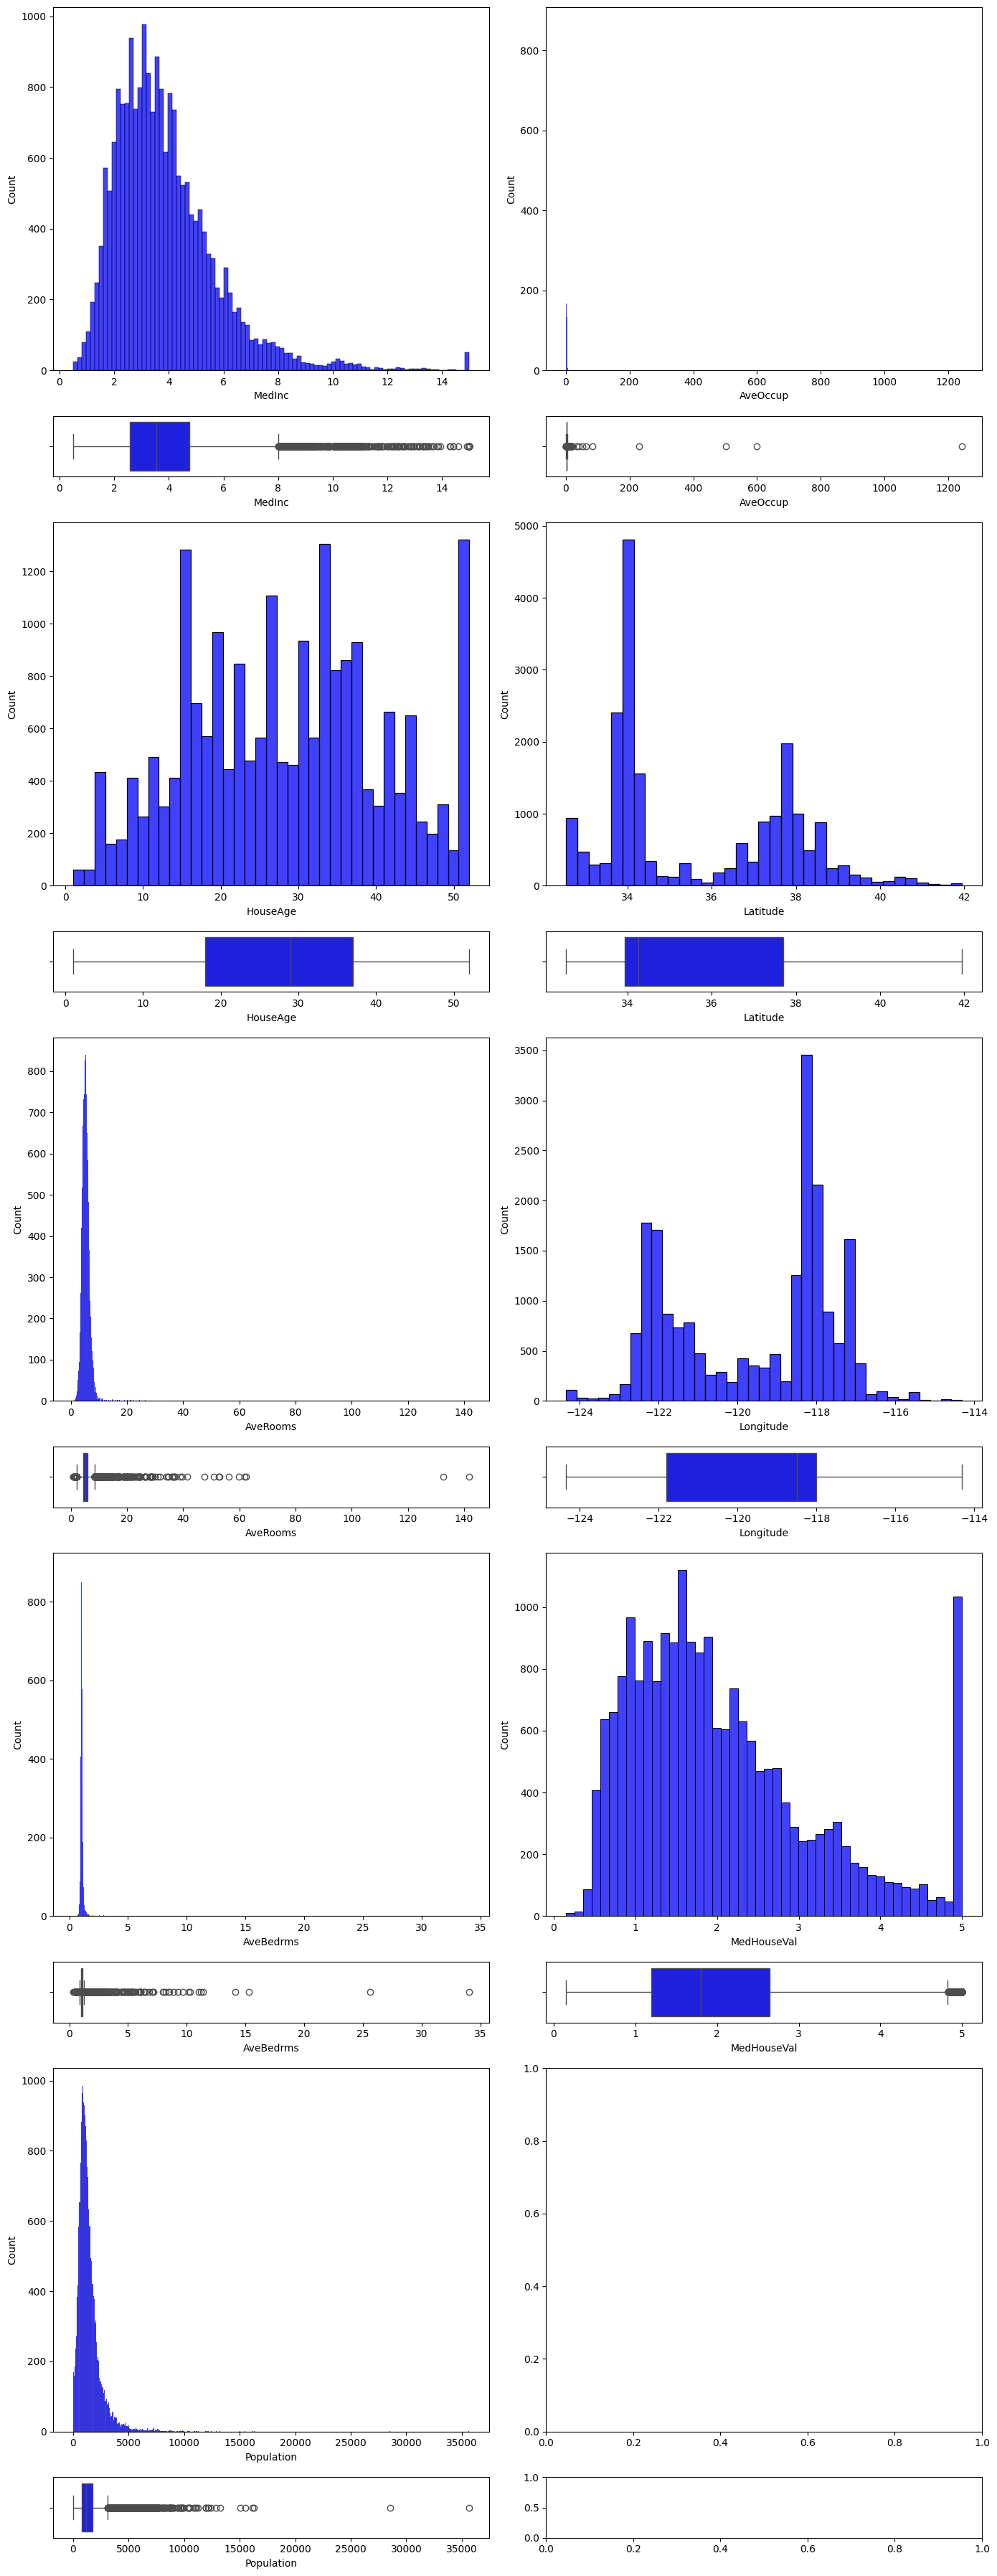

In [40]:
# Creamos 12 filas (n variables x 2 filas cada una), 2 columnas (2 variables por fila)
fig, axis = plt.subplots(10, 2, figsize=(14, 36),gridspec_kw={"height_ratios": [6, 1]*5})

for idx, var in enumerate(variables):
    col = idx // 5        # 0 para las primeras n, 1 para las otras n
    row = (idx % 5) * 2   # filas 0, 2, 4... para histogramas; +1 para boxplots

    sns.histplot(ax=axis[row, col], data=df, x=var, color='b')
    axis[row, col]

    sns.boxplot(ax=axis[row + 1, col], data=df, x=var, orient='h', color='b')
    axis[row + 1, col]

# Ajustamos el diseño
plt.tight_layout()
plt.show()

In [ ]:
# Detectar outliers usando el método IQR
outliers = {}

for columna in variables:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)].indeX_array_array_array
    outliers[columna] = len(outlier_indices)
    print(f"'{columna}': {len(outlier_indices)} outliers detectados.")

'MedInc': 681 outliers detectados.
'HouseAge': 0 outliers detectados.
'AveRooms': 511 outliers detectados.
'AveBedrms': 1424 outliers detectados.
'Population': 1196 outliers detectados.
'AveOccup': 711 outliers detectados.
'Latitude': 0 outliers detectados.
'Longitude': 0 outliers detectados.
'MedHouseVal': 1071 outliers detectados.


In [42]:
df_sin_outliers = df.copy()

for columna in variables:
    Q1 = df_sin_outliers[columna].quantile(0.25)
    Q3 = df_sin_outliers[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.8 * IQR
    # Filtrar los datos que están dentro de los límites
    df_sin_outliers = df_sin_outliers[(df_sin_outliers[columna] >= lower_bound) & (df_sin_outliers[columna] <= upper_bound)]

print(f"Nuevo tamaño del DataFrame: {df_sin_outliers.shape}")

Nuevo tamaño del DataFrame: (17611, 9)


In [43]:
print("Porcentaje que se redujo:",(len(df_sin_outliers) / len(df)-1)*100,"%")

Porcentaje que se redujo: -14.675387596899226 %


In [44]:
MLL = ['MedInc','Latitude','Longitude']

In [45]:
df_clean = df_sin_outliers[MLL]
df_clean

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20634,3.7125,39.27,-121.56
20635,1.5603,39.48,-121.09
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


<Axes: >

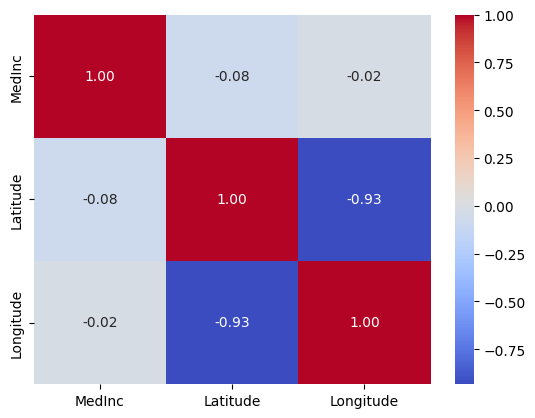

In [46]:
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm',fmt = ".2f")

In [49]:
from sklearn.model_selection import train_test_split

X = df_clean
y = df_clean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


print('El tamaño de X train es de:' ,X_train.shape)
print('El tamaño de Y train es de:' ,y_train.shape)
print('El tamaño de X test es de:' ,X_test.shape)
print('El tamaño de y test es de:' ,y_test.shape)

El tamaño de X train es de: (14088, 3)
El tamaño de Y train es de: (14088, 3)
El tamaño de X test es de: (3523, 3)
El tamaño de y test es de: (3523, 3)


In [50]:
X.describe()

,MedInc,Latitude,Longitude
count,17611.000000,17611.000000,17611.000000
mean,3.751104,35.636482,-119.612580
std,1.549205,2.124851,1.991449
min,0.536000,32.540000,-124.350000
25%,2.580400,33.940000,-121.820000
50%,3.540200,34.270000,-118.530000
75%,4.690350,37.720000,-118.040000
max,8.657300,41.950000,-114.570000


In [52]:
y.describe()

,MedInc,Latitude,Longitude
count,17611.000000,17611.000000,17611.000000
mean,3.751104,35.636482,-119.612580
std,1.549205,2.124851,1.991449
min,0.536000,32.540000,-124.350000
25%,2.580400,33.940000,-121.820000
50%,3.540200,34.270000,-118.530000
75%,4.690350,37.720000,-118.040000
max,8.657300,41.950000,-114.570000


## Escalado


In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
y_scaled = scaler.fit_transform(y_test)

In [80]:
X_scaled

array([[ 0.05195471,  0.9726885 , -1.40823843],
       [-1.22042753, -0.73473502,  0.65911484],
       [ 0.17151911, -0.5795147 , -0.04668858],
       ...,
       [ 0.23566144, -0.7629569 ,  0.85433706],
       [-0.37294784,  0.86920828, -1.20801051],
       [-0.41390074,  0.59639681, -1.05783957]], shape=(14088, 3))

In [81]:
y_scaled

array([[-0.2436544 , -0.62499195,  0.52217694],
       [-0.43648139,  1.06467363, -1.37109513],
       [ 0.55752723, -0.94121428,  0.93951111],
       ...,
       [ 0.08225217,  1.46113148, -0.85197214],
       [-0.54670503, -0.6438709 ,  0.18627383],
       [-0.60155931, -0.71938668,  0.80718564]], shape=(3523, 3))

## Modelado

In [82]:
# Entrenar el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [92]:
# Obtener los centros de los clusters y las etiquetas
centroids = model.cluster_centers_
labels = model.labels_

In [93]:
centroids

array([[ 1.17807735, -0.83638131,  0.77598807],
       [-0.86485241,  1.33869594, -1.14810724],
       [ 0.24433369,  1.02671135, -1.15013666],
       [-0.53233921, -0.86748075,  0.88215301],
       [ 1.66368503,  0.9341186 , -1.16889634],
       [-0.79424942,  0.21154994, -0.03922991]])

In [94]:
labels

array([2, 3, 3, ..., 3, 2, 2], shape=(14088,), dtype=int32)

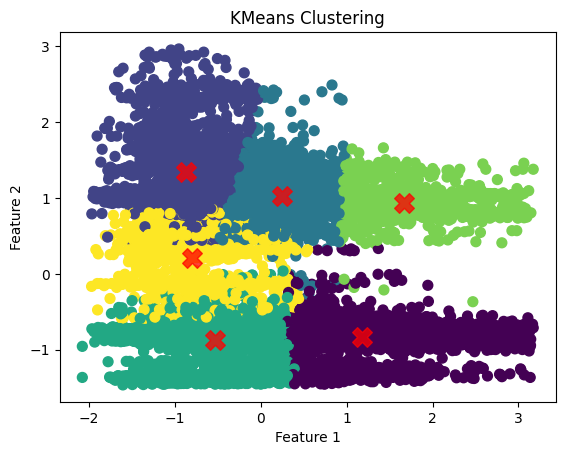

In [90]:
# Visualizar los resultados
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [105]:
X_train['cluster'] = pd.Series(labels).astype('category')
X_train['cluster'].value_counts()


cluster
3    3266
0    1766
2    1542
1    1473
5     742
4     654
Name: count, dtype: int64

### Predicción

In [106]:
# Realizar predicciones con datos nuevos
new_data = np.array(y_test)
predictions = model.predict(new_data)

predictions

array([1, 1, 4, ..., 1, 1, 1], shape=(3523,), dtype=int32)

In [75]:
new_data.shape

(3523, 3)